# Desafío - Pruebas de hipótesis
## Cristian Vidal

## 1. Evaluar juicios de hipótesis

* 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    * El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    * Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    * Con un valor de prueba p= 11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?

<b> Si sabemos que el puntaje de la prueba 11.83 y seguimos los criterios comunes de evaluar el estadístico al 99% de confianza (2.58), hay evidencia como para rechazar la hipótesis nula dado que nuestro puntaje de |11.83| es mayor a 2.58. De esta forma, se concluye que existe una diferencia substancial entre ambos encuestados (homosexuales y heterosexuales) frente a la adopción homoparental, siendo significativa al 99% de "confianza".</b>

* Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

<b>No tengo suficiente información para concluir sobre el estudio.</b>

## 2. Importe la base de datos utilizada la sesión presencial anterior

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('nations.csv', encoding = "ISO-8859-1")
df = df.drop(columns="Unnamed: 0")
df.sample(10)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
137,Andorra,Europe,NaN,10.400000,8.400000,4.00,80.516663,81733,89.116669,NaN,NaN,NaN,NaN
134,Viet Nam,Asia,2429.800049,5.233334,26.799999,24.75,74.400002,85490936,28.833332,0.8958,92.800003,4.450000,37.599998
27,Madagascar,Africa,919.799988,5.200000,134.300003,64.50,65.483337,19279600,29.316666,0.9466,64.500000,0.550000,47.200001
165,Norway,Europe,48169.398438,12.666667,9.000000,3.75,80.383331,4751700,78.466667,0.8738,NaN,39.849998,NaN
188,Papua New Guinea,Oceania,1953.800049,4.116667,66.900002,69.75,61.483334,6474600,12.516666,0.9656,60.099998,2.750000,NaN
85,Uruguay,Americas,10842.599609,8.166667,61.099998,14.00,76.349998,3342950,92.216667,0.7000,98.099998,7.100000,42.400002
7,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.200000,NaN
169,Russian Federation,Europe,13424.799805,9.783334,30.000000,14.25,67.399994,143305536,73.016663,0.8206,99.599998,39.349998,42.299999
11,Congo (Dem Rep),Africa,279.799988,3.416667,201.399994,199.00,47.516666,61654348,33.633331,0.6552,66.800003,0.100000,44.400002
132,United Arab Emirates,Asia,51992.601562,8.833333,26.700001,8.00,75.933334,5799100,83.183334,0.4448,90.000000,120.849998,NaN


<b>Agrege una serie de variables binarias por cada continente de la variable region</b>
* tip: Utilice np.where para ello

In [2]:
# Crear 5 variables binarias, 1 por cada continente.
regiones = df['region'].unique()
for region in regiones:
    df[region+'_binarize'] = np.where(df['region'] == region, 1, 0)

In [3]:
df.sample(10)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa_binarize,Americas_binarize,Asia_binarize,Europe_binarize,Oceania_binarize
81,St Vincent/Grenadines,Americas,8063.600098,8.600000,58.900002,13.75,71.599998,109100,48.200001,0.6972,NaN,6.050000,NaN,0,1,0,0,0
44,Sudan*,Africa,1838.800049,2.966667,61.900002,109.50,60.349998,40933000,38.283333,0.4116,70.199997,1.100000,NaN,1,0,0,0,0
102,Iraq,Asia,3052.000000,5.416667,98.000000,44.25,68.099998,29446400,66.516663,0.1942,78.099998,11.750000,NaN,0,0,1,0,0
82,Suriname,Americas,6441.250000,7.200000,39.500000,28.25,69.550003,512317,68.283333,0.5670,94.599998,19.450001,NaN,0,1,0,0,0
6,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.150000,NaN,1,0,0,0,0
181,Fiji,Oceania,4259.600098,10.300000,45.200001,18.00,68.783333,840417,50.900002,0.4954,NaN,7.250000,NaN,0,0,0,0,1
124,South Korea,Asia,24539.599609,11.350000,2.300000,5.25,79.783333,47615448,82.166664,0.6892,NaN,36.299999,NaN,0,0,1,0,0
27,Madagascar,Africa,919.799988,5.200000,134.300003,64.50,65.483337,19279600,29.316666,0.9466,64.500000,0.550000,47.200001,1,0,0,0,0
89,Azerbaijan,Asia,6945.000000,8.600000,33.799999,38.75,69.900002,8884767,51.700001,0.8890,NaN,15.400000,33.700001,0,0,1,0,0
127,Tajikistan,Asia,1650.599976,9.916666,28.400000,66.50,66.349998,6655934,26.316666,0.7220,99.699997,3.350000,29.400000,0,0,1,0,0


<b>De manera similar a la sesión anterior, enfóquese en las siguientes variables</b>
* femlab: Tasa entre hombres y mujeres en el mercado laboral
* literacy: Tasa de alfabetismo.
* school: Promedio años de escolaridad.

## 3. Implemente una función de prueba de hipótesis a mano

* La función debe ingresar los siguientes argumentos
    * df : La tabla de datos.
    * variable : La variable a analizar.
    * binarize : El indicador binario a utilizar.
* tips:
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().
    * Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
    * Reporte las medias para cada grupo (0 y 1).
    * Reporte la diferencia de entre las medias.
    * Reporte los valores t y p

In [4]:
def crear_grafico(x, variable, titulo):
    sns.distplot(x, label=titulo , norm_hist=True)
    plt.legend()
    
def get_prueba_hipotesis(df, variable, binarize):
    """
    get_prueba_hipotesis:
        Función que permite ejecutar un test de  hipótesis 
    parameters:
        df : La tabla de datos.
        variable : La variable a analizar.
        binarize : El indicador binario a utiliza
    returns:
        Media (grupo 1, grupo 2), Diferencias medias, statistic, pvalue
    """
    grupo_1 = df.query(binarize + ' == 1')[variable].dropna()
    grupo_2 = df.query(binarize + ' == 0')[variable].dropna()
    statistic, pvalue = stats.ttest_ind(grupo_1, grupo_2)
    media_grupo_1 = round(grupo_1.mean(), 3)
    media_grupo_2 = round(grupo_2.mean(), 3)
    diferencia_medias = round(media_grupo_1 - media_grupo_2, 3)
    # Reportar información
    print("Media {} ({}):{} ".format(binarize, variable, media_grupo_1))
    print("Media Resto de los Continentes ({}): {}".format(variable, media_grupo_2))
    print("Diferencia entre las medias: ", diferencia_medias)
    print('statistic:', statistic)
    print('pvalue:', pvalue)
    
    crear_grafico(grupo_1, variable, binarize + ' ('+variable+')')
    crear_grafico(grupo_2, variable, 'Resto de los Continentes ('+variable+')')
    plt.show()

Media Americas_binarize (gdp):10634.038 
Media Resto de los Continentes (gdp): 12454.322
Diferencia entre las medias:  -1820.284
statistic: -0.6763126232164977
pvalue: 0.49972496437556313


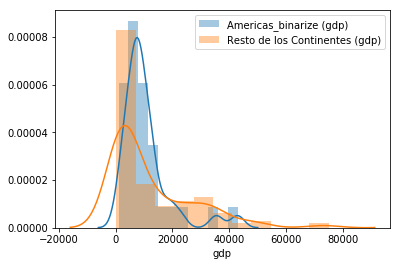

In [5]:
get_prueba_hipotesis(df, 'gdp', 'Americas_binarize')

## 4. Implemente una función que grafique los histogramas para ambas muestras.

* Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
    * tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot . Incluya los argumentos alpha y label .
    * Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto

Media Africa_binarize (femlab):0.73 
Media Resto de los Continentes (femlab): 0.676
Diferencia entre las medias:  0.054
statistic: 1.783872878266046
pvalue: 0.0761771840435915


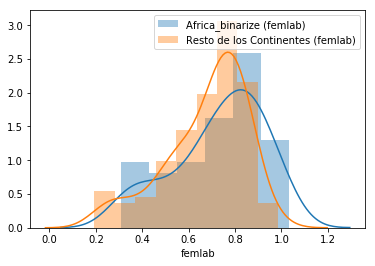

Media Americas_binarize (femlab):0.651 
Media Resto de los Continentes (femlab): 0.7
Diferencia entre las medias:  -0.049
statistic: -1.3731113408683462
pvalue: 0.1714745430099794


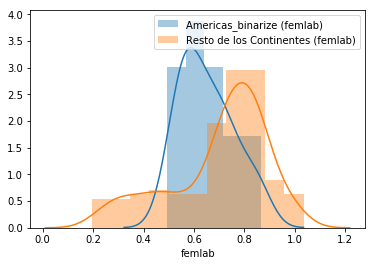

Media Asia_binarize (femlab):0.611 
Media Resto de los Continentes (femlab): 0.722
Diferencia entre las medias:  -0.111
statistic: -3.7455196595318414
pvalue: 0.00024413257519365062


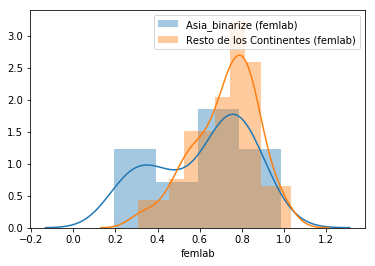

Media Europe_binarize (femlab):0.772 
Media Resto de los Continentes (femlab): 0.67
Diferencia entre las medias:  0.102
statistic: 3.063523760334362
pvalue: 0.0025335604834548654


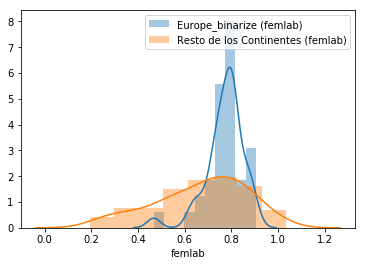

Media Oceania_binarize (femlab):0.723 
Media Resto de los Continentes (femlab): 0.69
Diferencia entre las medias:  0.033
statistic: 0.5346624412260645
pvalue: 0.593561944121326


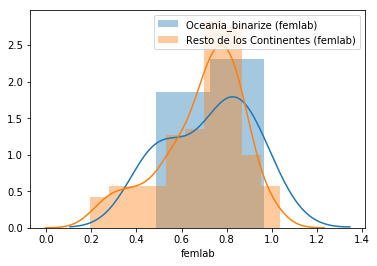

***************************************************************
Media Africa_binarize (literacy):65.309 
Media Resto de los Continentes (literacy): 90.199
Diferencia entre las medias:  -24.89
statistic: -8.909991173873896
pvalue: 3.3857112156459963e-15


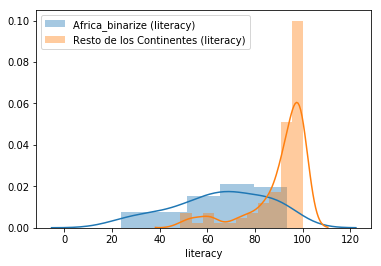

Media Americas_binarize (literacy):89.301 
Media Resto de los Continentes (literacy): 80.182
Diferencia entre las medias:  9.119
statistic: 1.953805549546212
pvalue: 0.05282297025501065


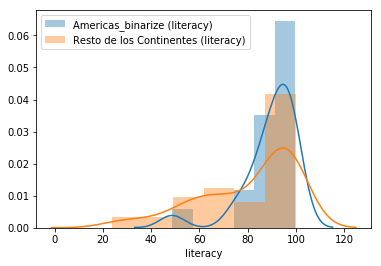

Media Asia_binarize (literacy):87.357 
Media Resto de los Continentes (literacy): 78.993
Diferencia entre las medias:  8.364
statistic: 2.3336279461015885
pvalue: 0.021114460773250368


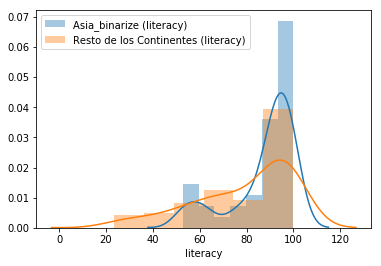

Media Europe_binarize (literacy):98.177 
Media Resto de los Continentes (literacy): 78.293
Diferencia entre las medias:  19.884
statistic: 4.71843149821332
pvalue: 5.935608765865936e-06


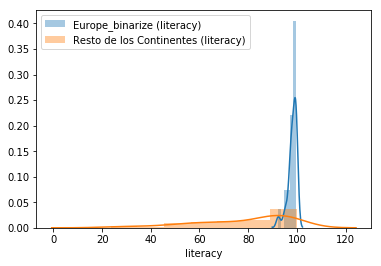

Media Oceania_binarize (literacy):81.98 
Media Resto de los Continentes (literacy): 81.516
Diferencia entre las medias:  0.464
statistic: 0.05211194697890982
pvalue: 0.9585176817316319


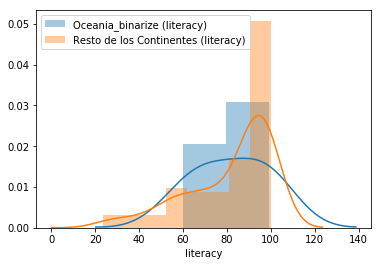

***************************************************************
Media Africa_binarize (school):4.523 
Media Resto de los Continentes (school): 8.552
Diferencia entre las medias:  -4.029
statistic: -10.415811831777058
pvalue: 2.6352830456717332e-20


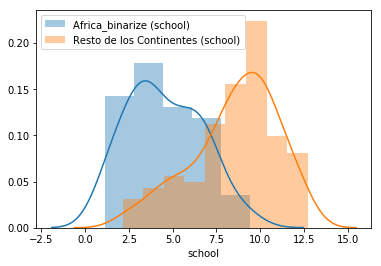

Media Americas_binarize (school):8.073 
Media Resto de los Continentes (school): 7.319
Diferencia entre las medias:  0.754
statistic: 1.362827174571195
pvalue: 0.17458464986808925


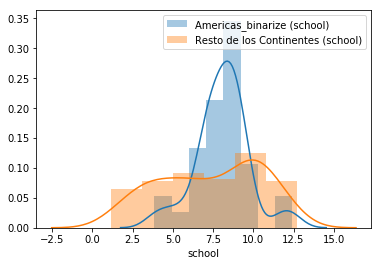

Media Asia_binarize (school):7.261 
Media Resto de los Continentes (school): 7.527
Diferencia entre las medias:  -0.266
statistic: -0.5363879996523622
pvalue: 0.5923313578645575


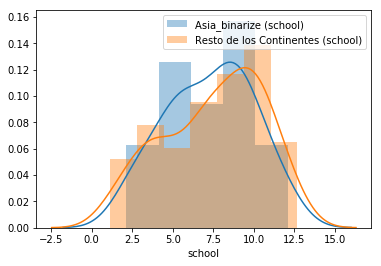

Media Europe_binarize (school):10.422 
Media Resto de los Continentes (school): 6.633
Diferencia entre las medias:  3.789
statistic: 8.524346217730443
pvalue: 5.20910302336092e-15


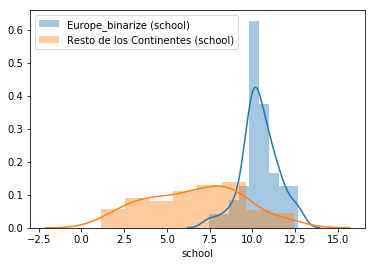

Media Oceania_binarize (school):8.715 
Media Resto de los Continentes (school): 7.366
Diferencia entre las medias:  1.349
statistic: 1.592662858961424
pvalue: 0.11293383755111722


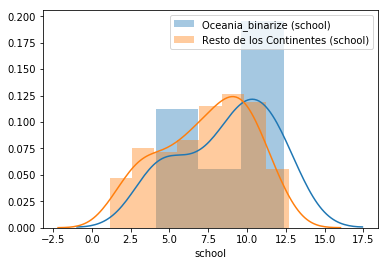

***************************************************************


In [6]:
variables_interes = ['femlab', 'literacy', 'school']
for variable in variables_interes:
    for continente in regiones:
        get_prueba_hipotesis(df, variable, continente + '_binarize')
    print('***************************************************************')

<b>Africa | Resto de los Continentes (school)</b>

<b>La evidencia entregada por ttest_ind sugiere que la diferencia en el promedio de años de escolaridad entre ambos grupos es significativa al 95%. El promedio de años de escolaridad para el continente africano corresponden a 4.5, mientras que en el resto del mundo son 8.5.</b>